<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Suburb-Rating-as-Proportion-of-Price-Range" data-toc-modified-id="Suburb-Rating-as-Proportion-of-Price-Range-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Suburb Rating as Proportion of Price Range</a></span></li><li><span><a href="#Wine-Estates,-Hotels-&amp;-Malls-Rating-vs-Cost" data-toc-modified-id="Wine-Estates,-Hotels-&amp;-Malls-Rating-vs-Cost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wine Estates, Hotels &amp; Malls Rating vs Cost</a></span></li><li><span><a href="#Suburb-Variety-by-Price-Range" data-toc-modified-id="Suburb-Variety-by-Price-Range-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Suburb Variety by Price Range</a></span></li><li><span><a href="#Foodie-Hotspots" data-toc-modified-id="Foodie-Hotspots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Foodie Hotspots</a></span></li></ul></div>

# Setup

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

plt.style.use('fivethirtyeight')

pd.options.display.max_columns = 999

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=400):
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
df = pd.read_csv('datasets/processed/zomato-cape-town-final.csv')
df.head()

name  aggregate_rating rating_text  votes  \
0    The Potluck Club               4.9   Excellent    406   
1          La Colombe               4.9   Excellent    146   
2         Moro Gelato               4.8   Excellent     72   
3  Unframed Ice Cream               4.7   Excellent    104   
4    The Test Kitchen               4.7   Excellent    242   

   average_cost_for_two  price_range                cuisines  cuisine_count  \
0                   600            4  European, Contemporary              2   
1                   645            4           French, Asian              2   
2                    80            1     Desserts, Ice Cream              2   
3                    40            1               Ice Cream              1   
4                  2800            4   Continental, European              2   

   has_online_delivery  has_table_booking            places place_type  \
0                    0                  0  Old Biscuit Mill       Mall   
1                    0                  0              None       None   
2                    0                  0              None       None   
3                    0                  0              None       None   
4                    0                  0  Old Biscuit Mill       Mall   

     locality                                 municipality            region  \
0   Woodstock  City of Cape Town Metropolitan Municipality         City Bowl   
1  Constantia  City of Cape Town Metropolitan Municipality  Southern Suburbs   
2         CBD  City of Cape Town Metropolitan Municipality         City Bowl   
3     Gardens  City of Cape Town Metropolitan Municipality         City Bowl   
4   Woodstock  City of Cape Town Metropolitan Municipality         City Bowl   

        city   latitude  longitude   ward_id  ward_num  African  American  \
0  Cape Town -33.927589  18.457068  19100015        15        0         0   
1  Cape Town -34.012639  18.402608  19100062        62        0         0   
2  Cape Town -33.924108  18.417317  19100015        15        0         0   
3  Cape Town -33.928691  18.412097  19100077        77        0         0   
4  Cape Town -33.927373  18.456906  19100015        15        0         0   

   Arabian  Asian  BBQ  Bakery  Bar Food  Belgian  Beverages  Brazilian  \
0        0      0    0       0         0        0          0          0   
1        0      1    0       0         0        0          0          0   
2        0      0    0       0         0        0          0          0   
3        0      0    0       0         0        0          0          0   
4        0      0    0       0         0        0          0          0   

   British  Burger  Cafe  Cafe Food  Cape Malay  Caribbean  Chinese  \
0        0       0     0          0           0          0        0   
1        0       0     0          0           0          0        0   
2        0       0     0          0           0          0        0   
3        0       0     0          0           0          0        0   
4        0       0     0          0           0          0        0   

   Coffee and Tea  Contemporary  Continental  Cuban  Deli  Desserts  \
0               0             1            0      0     0         0   
1               0             0            0      0     0         0   
2               0             0            0      0     0         1   
3               0             0            0      0     0         0   
4               0             0            1      0     0         0   

   Drinks Only  Durban  Egyptian  Ethiopian  European  Fast Food  Finger Food  \
0            0       0         0          0         1          0            0   
1            0       0         0          0         0          0            0   
2            0       0         0          0         0          0            0   
3            0       0         0          0         0          0            0   
4            0       0         0          0         1          0      

In [3]:
print("Data shape before removing rows:", df.shape)
df = df[(df.aggregate_rating != 0.0) & (df.average_cost_for_two != 0)]
print("Data shape after removing rows:", df.shape)

Data shape before removing rows: (1354, 94)
Data shape after removing rows: (1258, 94)


In [4]:
def top(df, n=5, column='aggregate_rating'):
    '''Returns the top n rows of data set df ordered desc'''
    return df.sort_values(by=column, ascending=False)[:n]

def bottom(df, n=5, column='aggregate_rating'):
    '''Returns the bottoms n rows of data set df ordered asc'''
    return df.sort_values(by=column, ascending=True)[:n]

def get_stats(group):
    '''Returns the min, max, count and mean summary statistics for a grouped data set'''
    return {'min': group.min(), 'max': group.max(), 'count': group.count(),
            'mean': group.mean(), 'median': group.median(), 'std': group.std()} 

def get_cuisine_cols():
    cols = ["name", "aggregate_rating", "rating_text", "votes", "average_cost_for_two", "price_range", "cuisines", "cuisine_count", "places", "locality", "region", "city", "latitude", "longitude", "has_online_delivery", "has_table_booking", "top_bottom", "place_type", "municipality", "ward_id", "ward_num", "ward_pop", "ward_area", "geometry", "ethnic", "Ethnic"]
    '''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    cuisine_cols = [col for col in df.columns.tolist() if col not in cols]
    return cuisine_cols 

def get_ethnic_cuisine_cols():
    ethnic = ["African", "American", "Arabian", "Asian", "Belgian", "Brazilian", "British", "Cape Malay", "Caribbean", "Chinese", "Cuban", "Durban", "Egyptian", "Ethiopian", "European", "French", "German", "Greek", "Indian", "Irish", "Italian", "Japanese", "Korean", "Latin American", "Lebanese", "Mediterranean", "Mexican", "Middle Eastern", "Modern European", "Moroccan", "Pakistani", "Portuguese", "South African", "Spanish", "Thai", "Turkish", "Vietnamese"]
    '''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    ethnic_cols = [col for col in get_cuisine_cols() if col in ethnic]
    return ethnic_cols

def get_non_ethnic_cuisine_cols():
    '''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    cols = [col for col in get_cuisine_cols() if col not in get_ethnic_cuisine_cols()]
    return cols

# if less than R1K, show as R800 (for eg). If btw R1000 and R999,999, show as R1K or R999K. If R1,000,000 or greater, show as R1M
def currency_formatter(x, pos):
    if x >= 1000000:
        return 'R%1.1fM' % (x * 1e-6)
    elif x < 1000:
        return 'R%1.1d' % (x)
    else:
        return 'R%1.1dK' % (x * 1e-3) 
    
axes_formatter = FuncFormatter(currency_formatter) 

set2_palette = sns.color_palette("Set2")
flatui_palette = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

# Suburb Rating as Proportion of Price Range

In [21]:
ordered_suburbs = df.pivot_table(index="locality", values="aggregate_rating", aggfunc={"aggregate_rating": ["mean", "count"]}).sort_values(by="mean", ascending=False)
ordered_suburbs = ordered_suburbs[ordered_suburbs["count"] >= 10]
ordered_suburbs

count      mean
locality                         
Constantia           30  3.820000
Newlands             21  3.680952
Gardens              47  3.625532
Woodstock            26  3.592308
Green Point          41  3.590244
Camps Bay            19  3.468421
CBD                 134  3.467164
Franschhoek          48  3.466667
De Waterkant         18  3.433333
Paarl                32  3.428125
Stellenbosch        127  3.404724
V & A Waterfront     74  3.360811
Sea Point            48  3.293750
Hout Bay             17  3.288235
Somerset West        35  3.222857
Durbanville          39  3.174359
Robertson            12  3.166667
Claremont            46  3.160870
Observatory          23  3.160870
Hermanus             25  3.152000
Foreshore            16  3.056250
Century City         36  3.050000
Bloubergstrand       12  3.050000
Table View           30  3.040000
Plattekloof          10  3.040000
Kenilworth           24  2.975000
Strand               10  2.920000
Bellville            45  2.888889
Tokai                10  2.820000
Goodwood             17  2.747059
Brackenfell          18  2.744444
Rondebosch           16  2.625000

In [23]:
top10_suburbs_names = ordered_suburbs[:10].reset_index()["locality"]
top10_suburbs_names

0      Constantia
1        Newlands
2         Gardens
3       Woodstock
4     Green Point
5       Camps Bay
6             CBD
7     Franschhoek
8    De Waterkant
9           Paarl
Name: locality, dtype: object

In [29]:
# Find top suburbs by rating
# Show each as rating vs cost scatter
# Each scatter seperated by hue of price range
suburb_ratings = df.pivot_table(index=["locality", "price_range"], values=["average_cost_for_two", "aggregate_rating"]).reset_index()
suburb_ratings

locality  price_range  aggregate_rating  \
0                            Athlone            1          2.900000   
1                            Athlone            2          2.650000   
2                            Athlone            4          2.400000   
3                          Bellville            1          2.933333   
4                          Bellville            2          2.908333   
5                          Bellville            3          2.830000   
6                          Bellville            4          2.887500   
7                          Bergvliet            3          3.100000   
8                     Bloubergstrand            1          3.000000   
9                     Bloubergstrand            2          3.200000   
10                    Bloubergstrand            3          3.166667   
11                    Bloubergstrand            4          2.950000   
12                       Brackenfell            2          2.800000   
13                       Brackenfell            3          2.750000   
14                       Brackenfell            4          2.600000   
15                               CBD            1          3.666667   
16                               CBD            2          3.235000   
17                               CBD            3          3.539583   
18                               CBD            4          3.588372   
19                         Camps Bay            1          3.400000   
20                         Camps Bay            2          3.450000   
21                         Camps Bay            3          3.125000   
22                         Camps Bay            4          3.591667   
23   Cape Town International Airport            2          2.400000   
24   Cape Town International Airport            3          2.566667   
25   Cape Town International Airport            4          2.200000   
26                      Century City            1          3.300000   
27                      Century City            2          2.965000   
28                      Century City            3          3.500000   
29                      Century City            4          2.955556   
..                               ...          ...               ...   
174                       Table View            1          2.833333   
175                       Table View            2          3.075000   
176                       Table View            3          3.000000   
177                       Table View            4          3.200000   
178                    Tamboerskloof            2          3.833333   
179                    Tamboerskloof            3          2.700000   
180                    Tamboerskloof            4          3.400000   
181                            Tokai            1          4.000000   
182                            Tokai            2          2.560000   
183                            Tokai            3          3.150000   
184                            Tokai            4          2.550000   
185                 V & A Waterfront            1          3.400000   
186                 V & A Waterfront            2          3.217391   
187                 V & A Waterfront            3          3.100000   
188                 V & A Waterfront            4          3.489474   
189                        Vredehoek            3          3.700000   
190                       Wellington            1          3.150000   
191                       Wellington            3          3.150000   
192                       Wellington            4          3.200000   
193                        Woodstock            1          3.550000   
194                        Woodstock            2          3.175000   
195                        Woodstock            3          3.612500   
196                        Woodstock            4          4.000000   
197                        Worcester            1          3.100000   
198                          Wynberg            2   

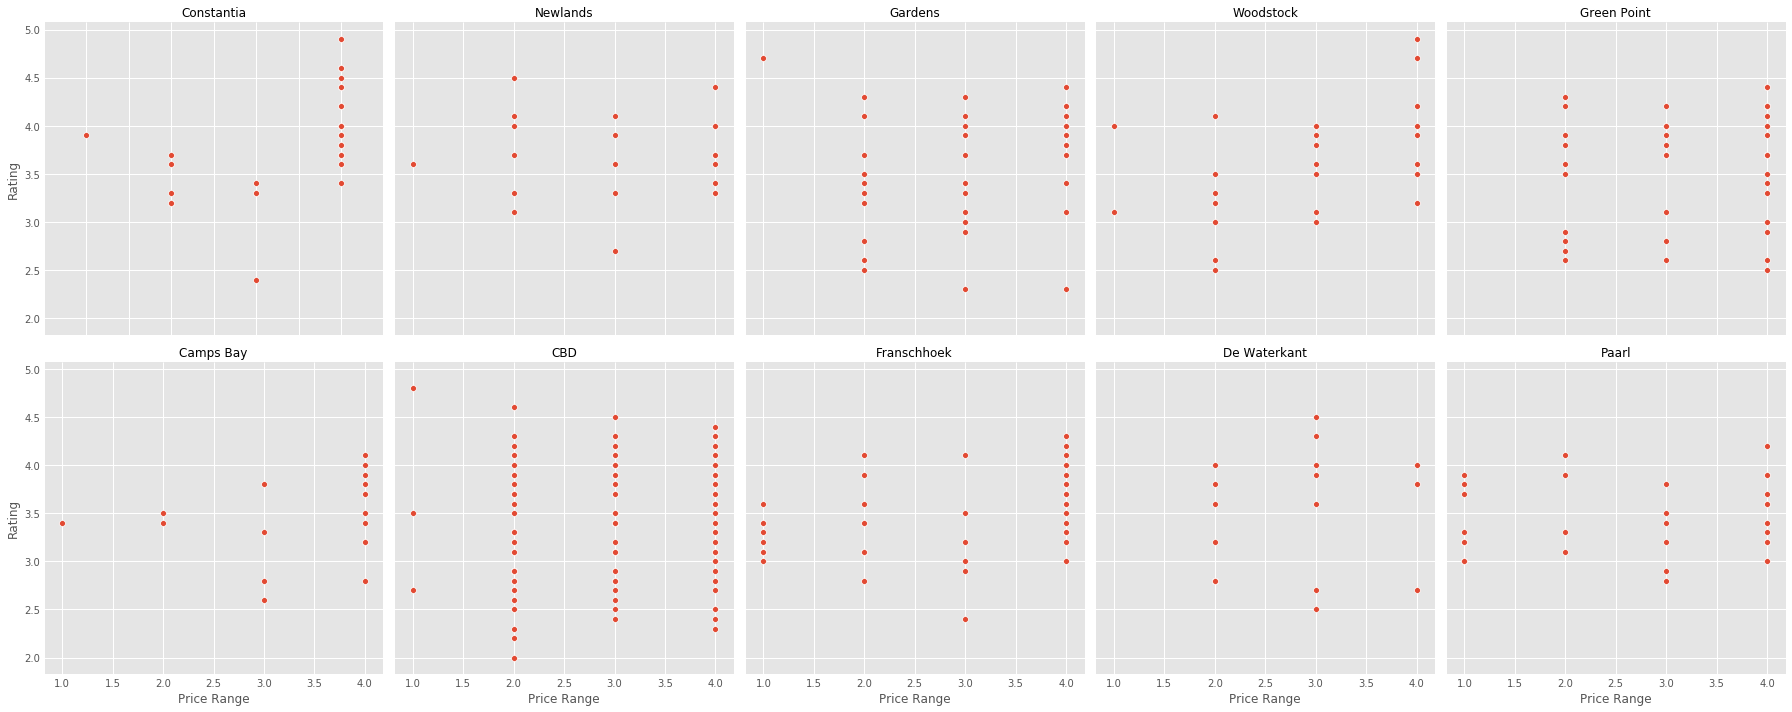

In [107]:
plt.style.use('ggplot')
g = (sns.relplot(data=df[df.locality.isin(top10_suburbs_names)], x="price_range", y="aggregate_rating",
            col="locality", col_order=top10_suburbs_names, col_wrap=5)).set_titles("{col_name}").set_ylabels("Rating").set_xlabels("Price Range").set_xticklabels(step=1)


[Text(0,0,''),
 Text(0,0,'<R100'),
 Text(0,0,'R100-\nR200'),
 Text(0,0,'R200-\nR300'),
 Text(0,0,'R300+')]

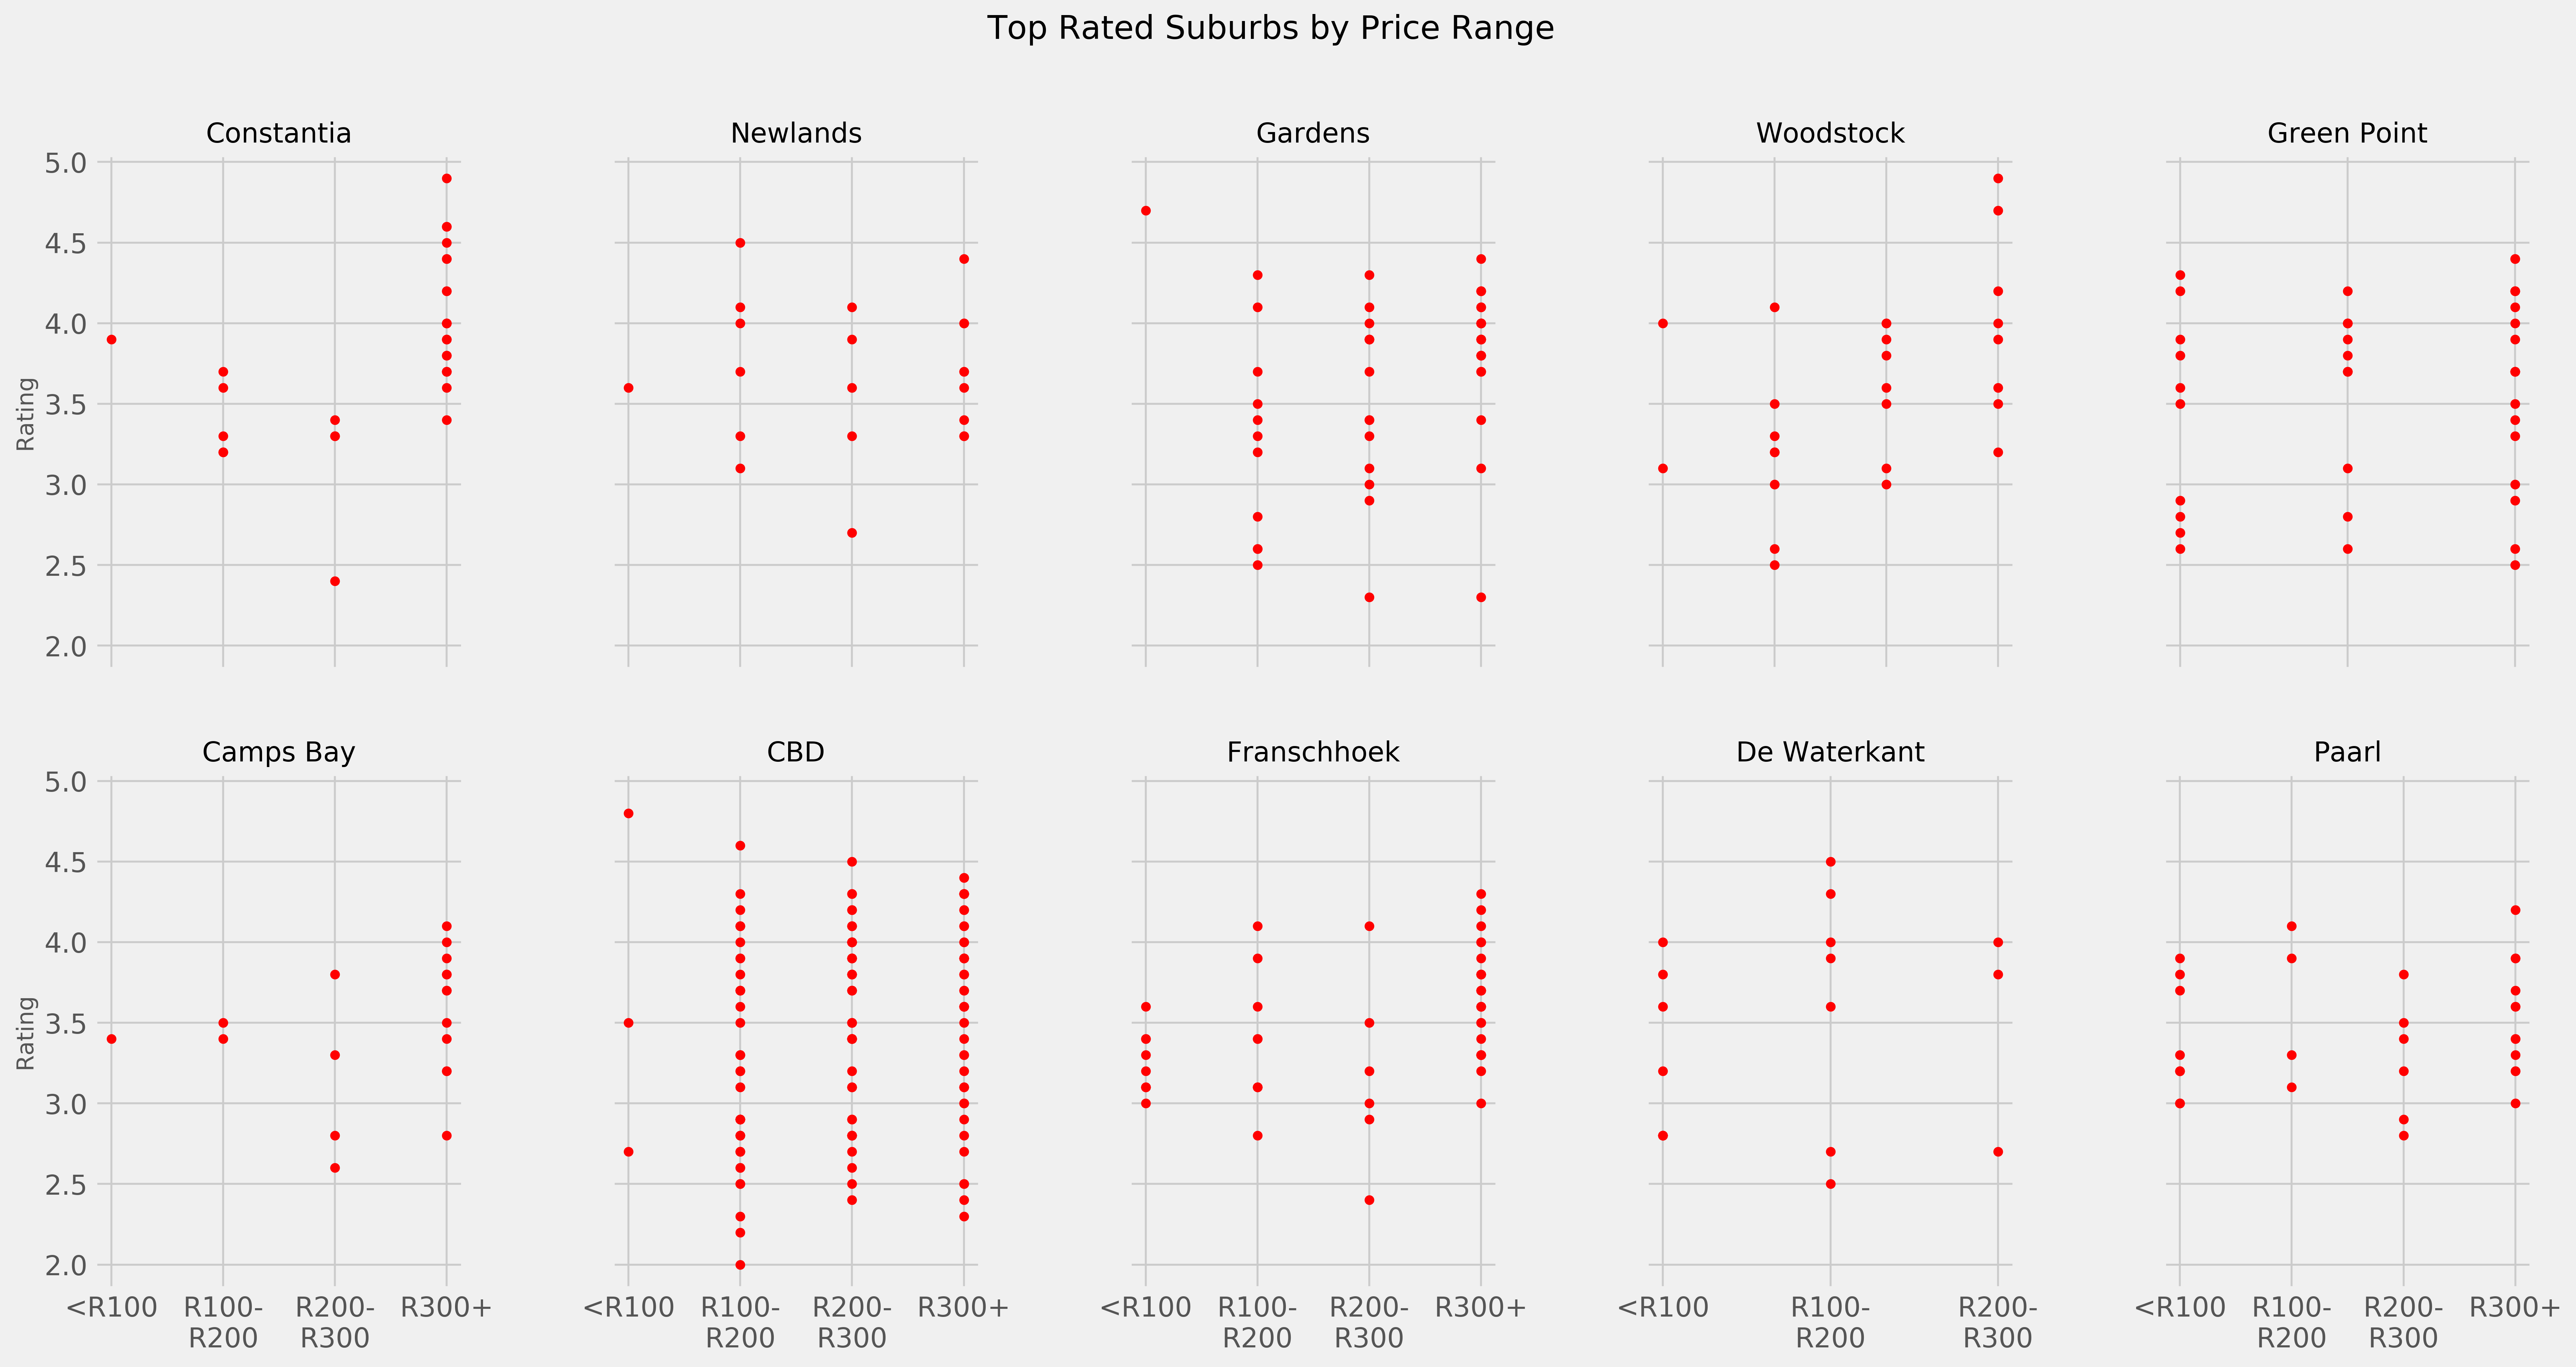

In [207]:
suburb_plots = df[df.locality.isin(top10_suburbs_names)]
fig, axes = plt.subplots(2, 5, figsize=(20, 10), dpi=400, sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.suptitle("Top Rated Suburbs by Price Range")
ax = suburb_plots[suburb_plots.locality=="Constantia"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[0][0], color="r")
ax.set_ylabel("Rating", fontdict={"fontsize": 12})
ax.set_xlabel("")
ax.set_title("Constantia", fontdict={"fontsize": 14})
for label in ax.get_xticklabels():
    label.set_visible(False)

ax = suburb_plots[suburb_plots.locality=="Newlands"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[0][1], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Newlands", fontdict={"fontsize": 14})
for label in ax.get_xticklabels():
    label.set_visible(False)

ax = suburb_plots[suburb_plots.locality=="Gardens"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[0][2], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Gardens", fontdict={"fontsize": 14})
for label in ax.get_xticklabels():
    label.set_visible(False)

ax = suburb_plots[suburb_plots.locality=="Woodstock"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[0][3], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Woodstock", fontdict={"fontsize": 14})
for label in ax.get_xticklabels():
    label.set_visible(False)

ax = suburb_plots[suburb_plots.locality=="Green Point"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[0][4], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Green Point", fontdict={"fontsize": 14})
for label in ax.get_xticklabels():
    label.set_visible(False)

ax = suburb_plots[suburb_plots.locality=="Camps Bay"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[1][0], color="r")
ax.set_ylabel("Rating", fontdict={"fontsize": 12})
ax.set_xlabel("")
ax.set_title("Camps Bay", fontdict={"fontsize": 14})
ax.set_xticklabels(labels=["", "<R100", "R100-\nR200", "R200-\nR300", "R300+"])

ax = suburb_plots[suburb_plots.locality=="CBD"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[1][1], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("CBD", fontdict={"fontsize": 14})
ax.set_xticklabels(labels=["", "<R100", "R100-\nR200", "R200-\nR300", "R300+"])

ax = suburb_plots[suburb_plots.locality=="Franschhoek"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[1][2], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Franschhoek", fontdict={"fontsize": 14})
ax.set_xticklabels(labels=["", "<R100", "R100-\nR200", "R200-\nR300", "R300+"])

ax = suburb_plots[suburb_plots.locality=="De Waterkant"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[1][3], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("De Waterkant", fontdict={"fontsize": 14})
ax.set_xticklabels(labels=["", "<R100", "R100-\nR200", "R200-\nR300", "R300+"])

ax = suburb_plots[suburb_plots.locality=="Paarl"].plot.scatter(x="price_range", y="aggregate_rating", ax=axes[1][4], color="r")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Paarl", fontdict={"fontsize": 14})
ax.set_xticklabels(labels=["", "<R100", "R100-\nR200", "R200-\nR300", "R300+"])



# Wine Estates, Hotels & Malls Rating vs Cost

Text(0.5,1,'Hotels')

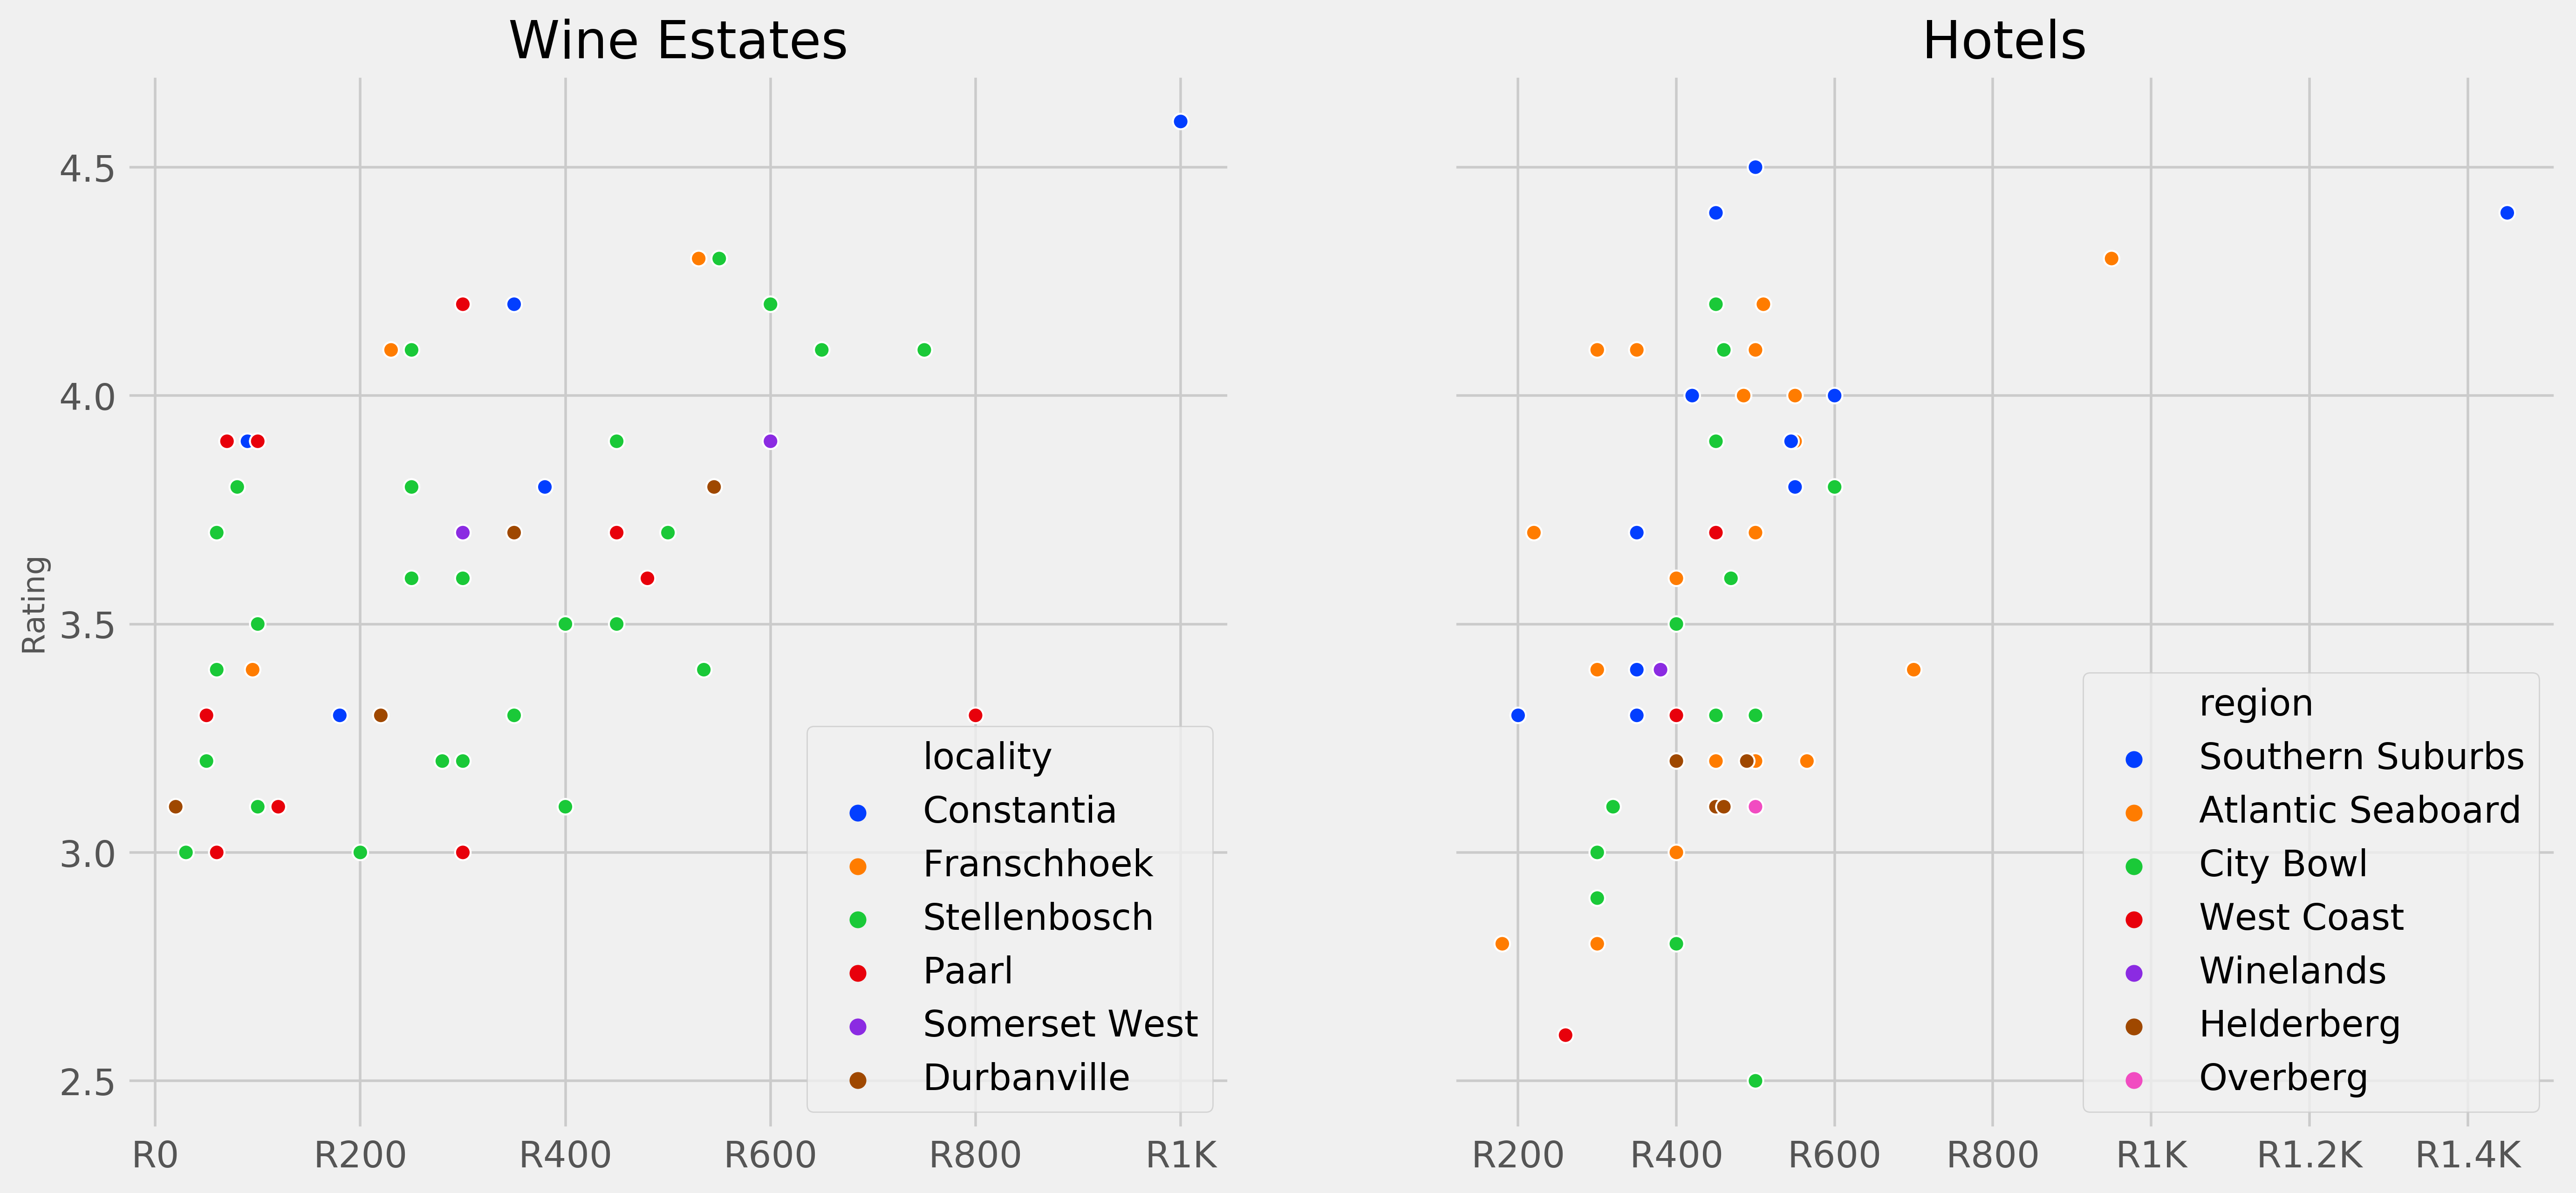

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), dpi=400, sharey=True)
ax = sns.scatterplot(data=df[df.place_type=="Wine"], x="average_cost_for_two", y="aggregate_rating", hue="locality", ax=axes[0], palette="bright")
ax.xaxis.set_major_formatter(axes_formatter)
ax.set_xlabel("")
ax.set_ylabel("Rating", fontdict={"fontsize": 12})
ax.set_title("Wine Estates")
ax = sns.scatterplot(data=df[df.place_type=="Hotel"], x="average_cost_for_two", y="aggregate_rating", hue="region", ax=axes[1], palette="bright")
ax.set_xticklabels(["R0", "R200", "R400", "R600", "R800", "R1K", "R1.2K", "R1.4K", "R1.6K"])
ax.set_xlabel("")
ax.set_title("Hotels")

Text(0,0.5,'Rating')

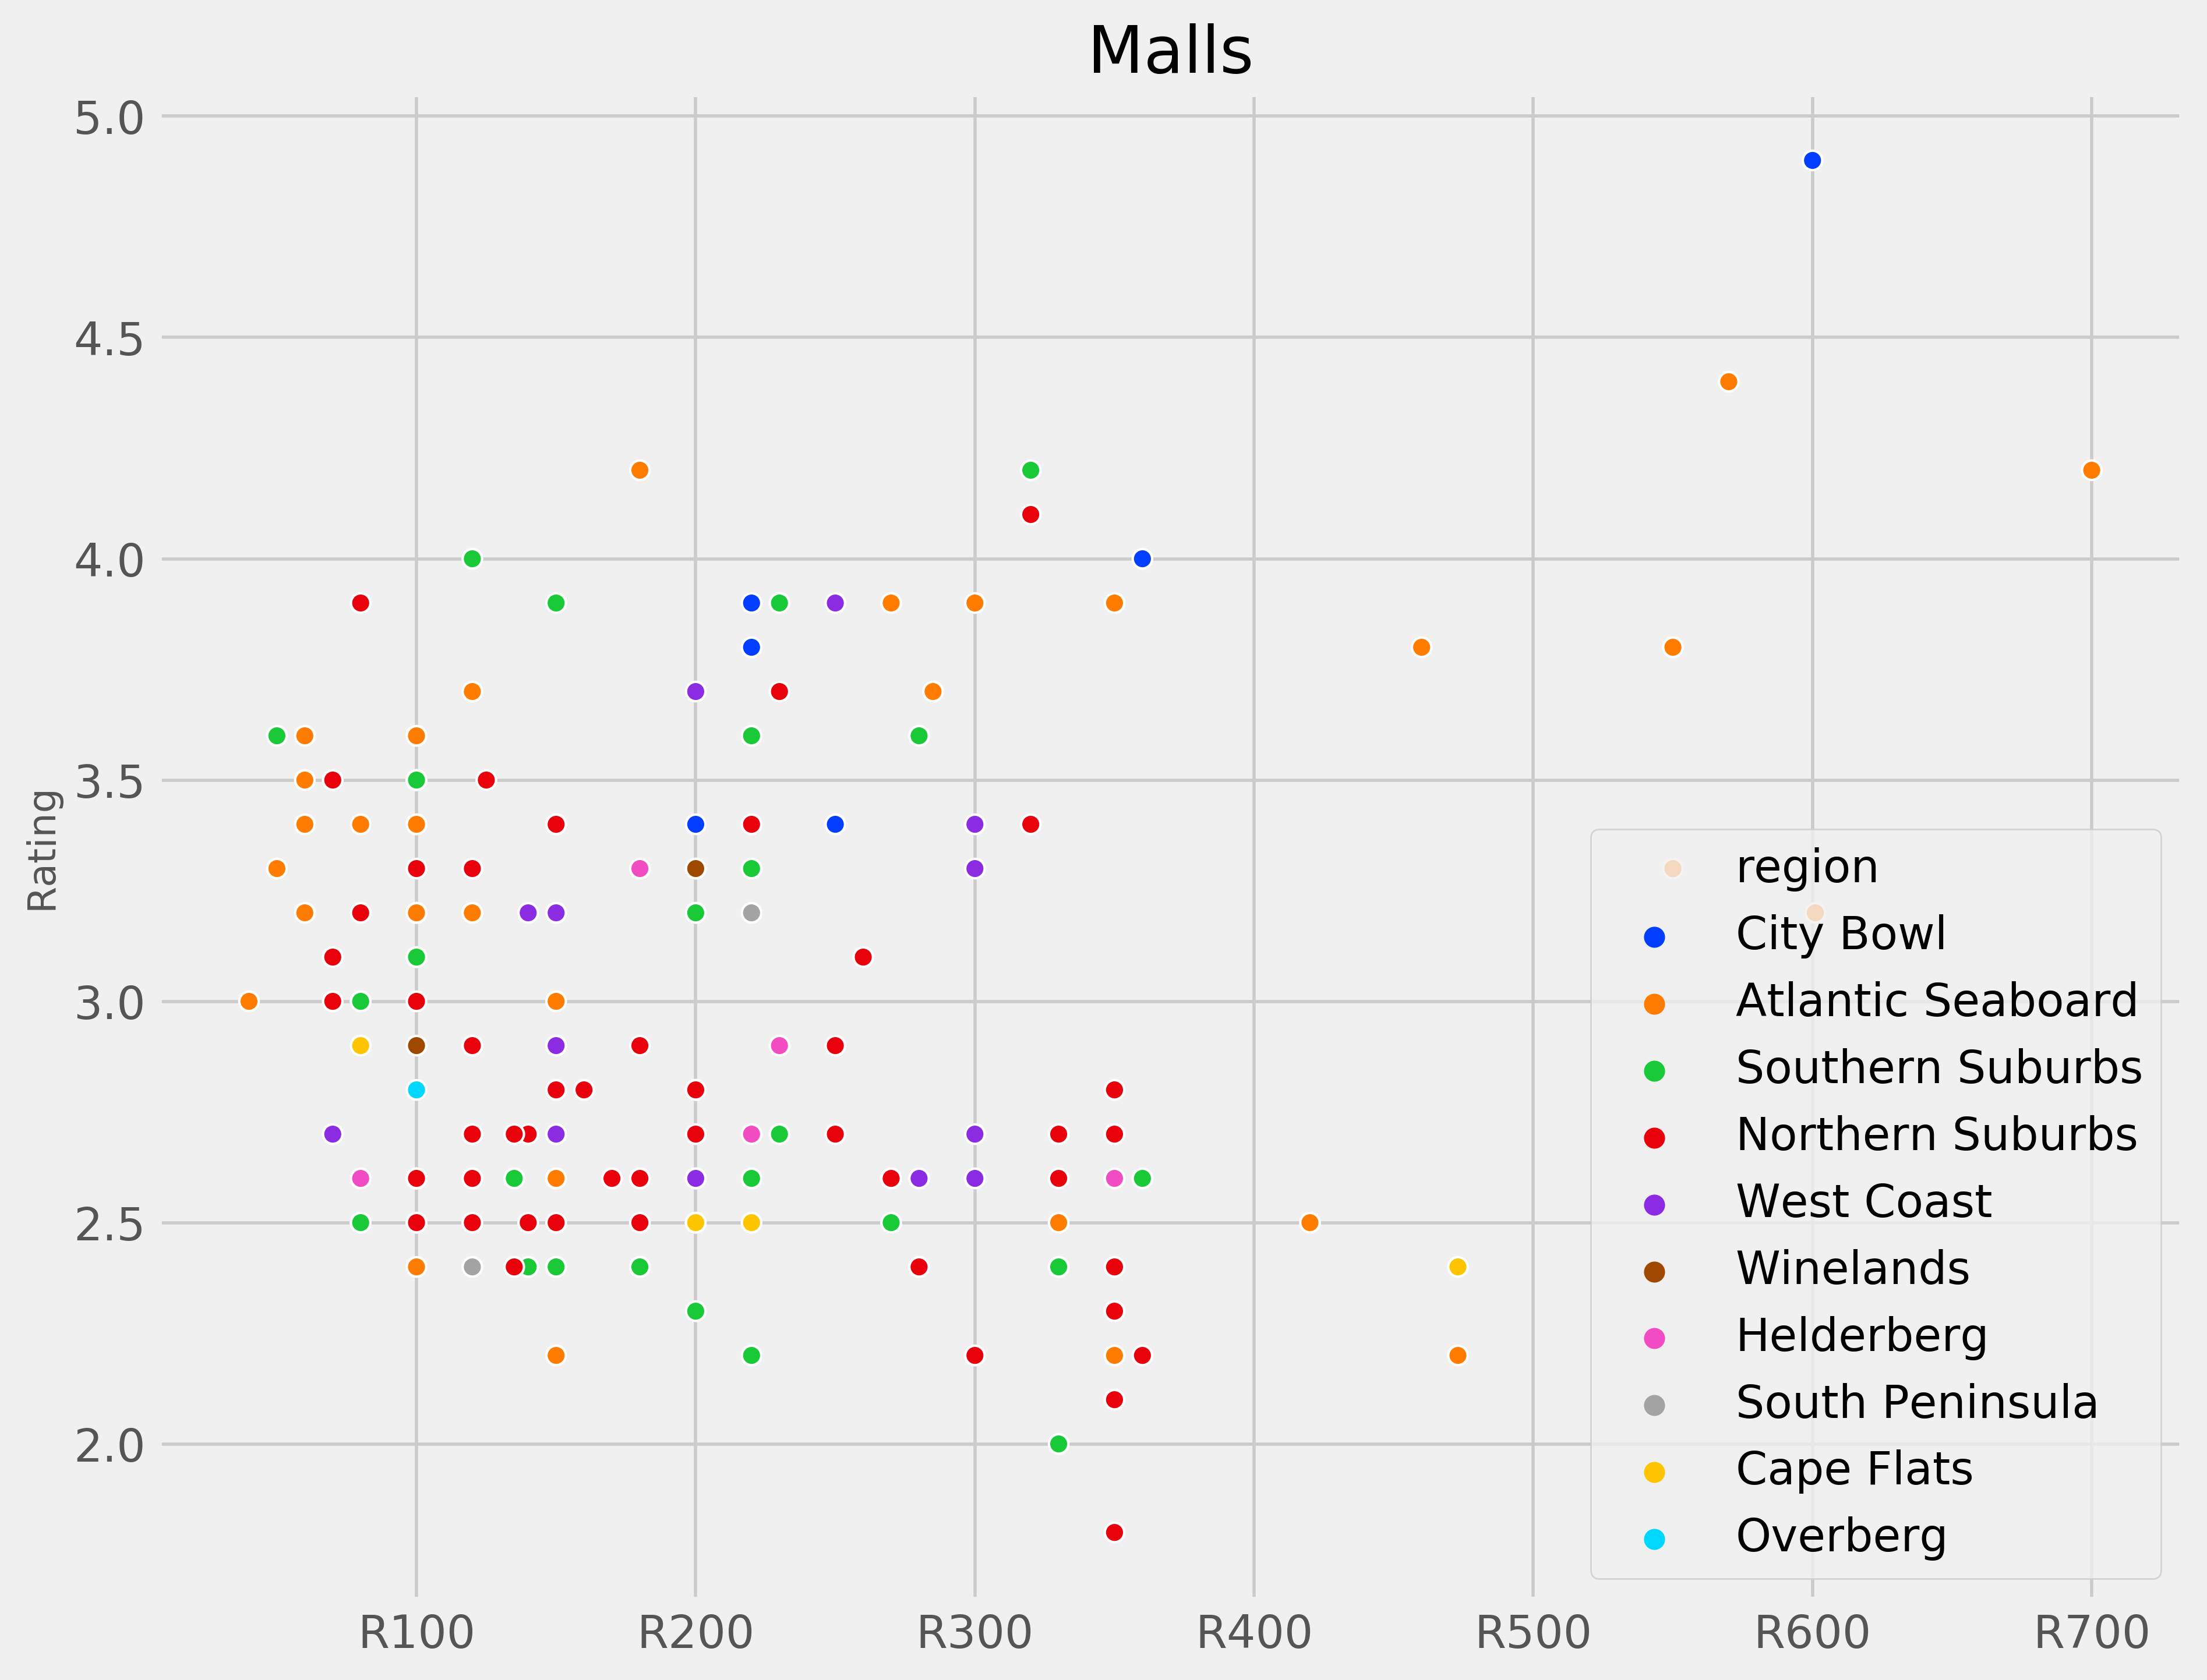

In [220]:
fig, axes = plt.subplots(figsize=(10, 8), dpi=400)
ax = sns.scatterplot(data=df[(df.place_type=="Mall")&(df.average_cost_for_two<2000)], x="average_cost_for_two", y="aggregate_rating", hue="region", ax=axes,
                    palette="bright")
ax.set_title("Malls")
ax.set_xlabel("")
ax.set_xticklabels(["R0", "R100", "R200", "R300", "R400", "R500", "R600", "R700"])
ax.set_ylabel("Rating", fontdict={"fontsize": 12})

Text(0,0.5,'Rating')

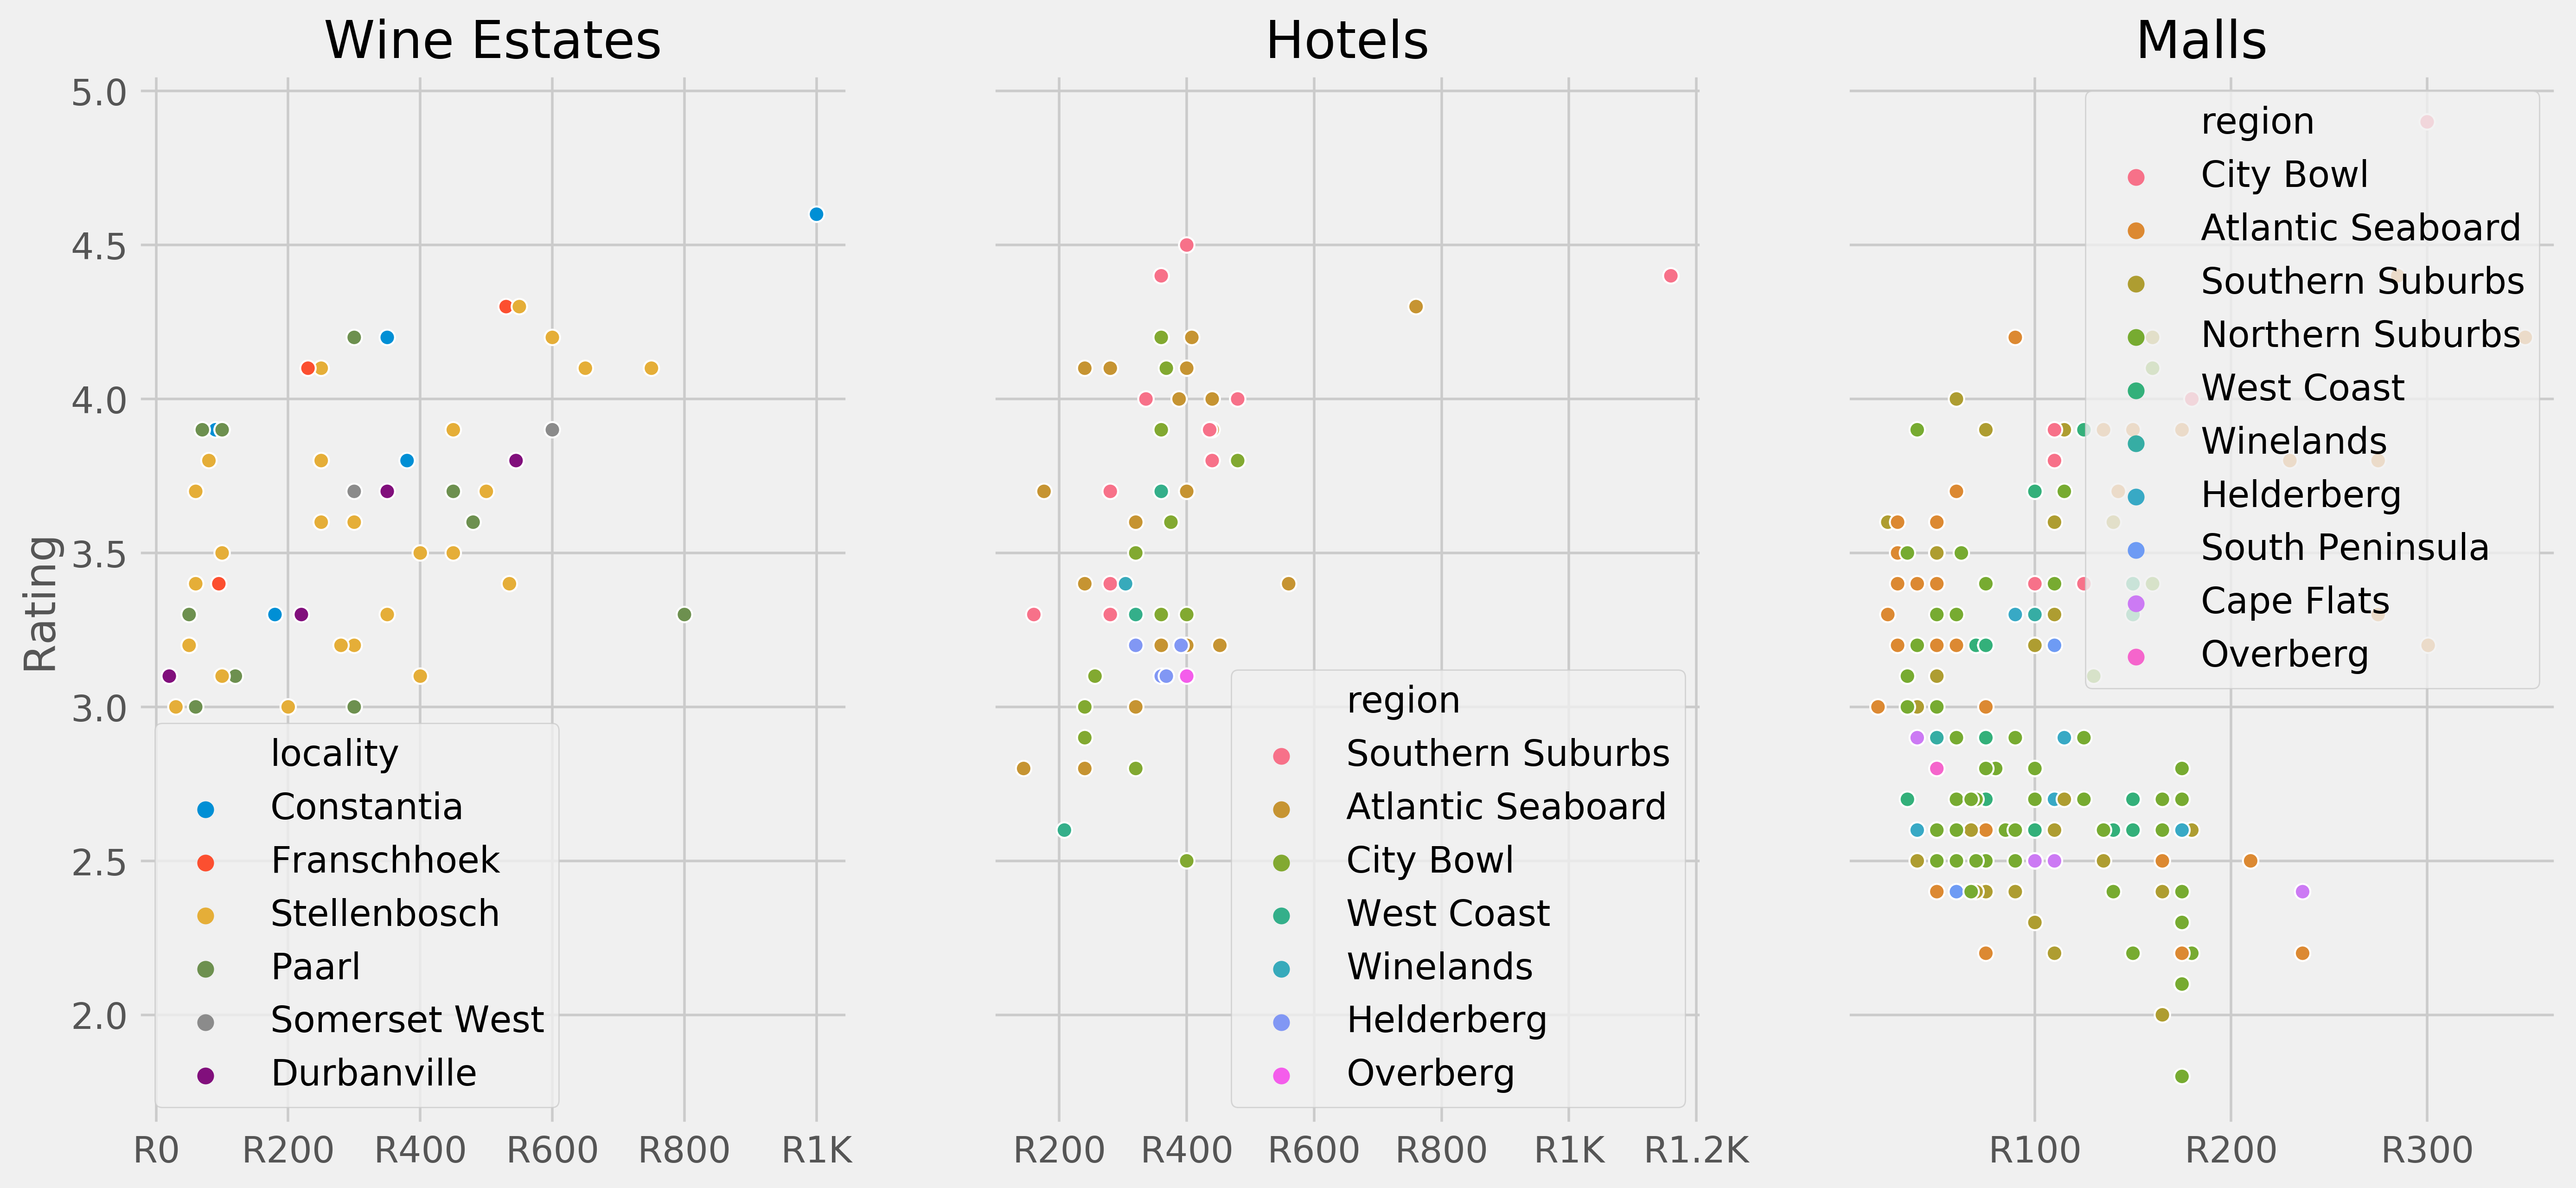

In [214]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7), dpi=400, sharey=True)
ax = sns.scatterplot(data=df[df.place_type=="Wine"], x="average_cost_for_two", y="aggregate_rating", hue="locality", ax=axes[0])
ax.xaxis.set_major_formatter(axes_formatter)
ax.set_xlabel("")
ax.set_ylabel("Rating")
ax.set_title("Wine Estates")

ax = sns.scatterplot(data=df[df.place_type=="Hotel"], x="average_cost_for_two", y="aggregate_rating", hue="region", ax=axes[1])
ax.set_xticklabels(["R0", "R200", "R400", "R600", "R800", "R1K", "R1.2K", "R1.4K", "R1.6K"])
ax.set_xlabel("")
ax.set_ylabel("Rating")
ax.set_title("Hotels")

ax = sns.scatterplot(data=df[(df.place_type=="Mall")&(df.average_cost_for_two<2000)], x="average_cost_for_two", y="aggregate_rating", hue="region", ax=axes[2])
ax.set_title("Malls")
ax.set_xlabel("")
ax.set_xticklabels(["R0", "R100", "R200", "R300", "R400", "R500", "R600", "R700"])
ax.set_ylabel("Rating")

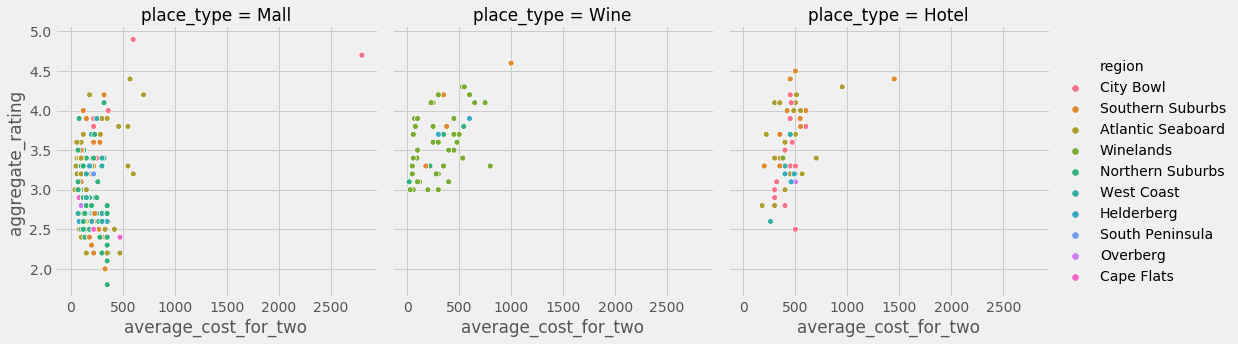

In [179]:
sns.relplot(data=df[df.place_type.isin(["Wine", "Hotel", "Mall"])], x="average_cost_for_two", y="aggregate_rating", col="place_type", hue="region")

# Suburb Variety by Price Range

In [233]:
# find top 10 suburbs by variety
# show bar plots per suburb, different col for each price range

def get_suburb_variety(row):
    total = 0
    for col in get_cuisine_cols():
        if row[col] > 0:
            total += 1
    return total
    
variety_by_price = df.pivot_table(index=["locality", "price_range"])
variety_by_price["variety_count"] = variety_by_price.apply(get_suburb_variety, axis=1)
variety_by_price.head(10)

African  American  Arabian  Asian  BBQ    Bakery  \
locality       price_range                                                     
Athlone        1                0.0     0.000      0.0  0.000  0.0  0.000000   
               2                0.0     0.000      0.0  0.000  0.0  0.000000   
               4                0.0     0.000      0.0  0.000  0.0  0.000000   
Bellville      1                0.0     0.000      0.0  0.000  0.0  0.333333   
               2                0.0     0.000      0.0  0.000  0.0  0.208333   
               3                0.0     0.100      0.0  0.000  0.0  0.000000   
               4                0.0     0.125      0.0  0.125  0.0  0.000000   
Bergvliet      3                0.0     0.000      0.0  0.000  0.0  0.500000   
Bloubergstrand 1                0.0     0.000      0.0  0.000  0.0  0.000000   
               2                0.0     0.000      0.0  0.000  0.0  0.000000   

                            Bar Food  Belgian  Beverages  Brazilian  British  \
locality       price_range                                                     
Athlone        1                 0.0      0.0        0.0        0.0      0.0   
               2                 0.0      0.0        0.0        0.0      0.0   
               4                 0.0      0.0        0.0        0.0      0.0   
Bellville      1                 0.0      0.0        0.0        0.0      0.0   
               2                 0.0      0.0        0.0        0.0      0.0   
               3                 0.0      0.0        0.0        0.0      0.0   
               4                 0.0      0.0        0.0        0.0      0.0   
Bergvliet      3                 0.0      0.0        0.5        0.0      0.0   
Bloubergstrand 1                 0.0      0.0        0.0        0.0      0.0   
               2                 0.0      0.0        0.0        0.0      0.0   

                              Burger      Cafe  Cafe Food  Cape Malay  \
locality       price_range                                              
Athlone        1            0.000000  0.000000        0.0         0.0   
               2            0.000000  0.000000        0.0         0.0   
               4            0.000000  0.000000        0.0         0.0   
Bellville      1            0.000000  0.000000        0.0         0.0   
               2            0.041667  0.416667        0.0         0.0   
               3            0.100000  0.500000        0.0         0.0   
               4            0.250000  0.125000        0.0         0.0   
Bergvliet      3            0.500000  0.000000        0.0         0.0   
Bloubergstrand 1            0.000000  0.000000        0.0         0.0   
               2            0.000000  0.000000        0.0         0.0   

                            Caribbean   Chinese  Coffee and Tea  Contemporary  \
locality       price_range                                                      
Athlone        1                  0.0  0.000000             0.0           0.0   
               2                  0.0  0.250000             0.0           0.0   
               4                  0.0  0.000000             0.0           0.0   
Bellville      1                  0.0  0.000000             0.0           0.0   
               2                  0.0  0.041667             0.0           0.0   
               3                  0.0  0.100000             0.0           0.1   
               4                  0.0  0.125000             0.0           0.0   
Bergvliet      3                  0.0  0.000000             0.0           0.5   
Bloubergstrand 1                  0.0  0.000000             0.0           0.0   
               2                  0.0  0.500000             0.0           0.0   

                            Continental  Cuban      Deli  Desserts  \
locality       price_range                                           
Athlone        1                    0.0    0.0  0.000000  1.000000   
               2                    0.0    0.0

In [239]:
variety_totals = df.pivot_table(index=["locality"])
variety_totals["variety_count"] = variety_totals.apply(get_suburb_variety, axis=1)
top10_variety_suburbs = variety_totals.sort_values(by="variety_count", ascending=False).head(10).reset_index()["locality"]

In [241]:
variety_by_price = variety_by_price.reset_index()
variety_by_price = variety_by_price[variety_by_price.locality.isin(top10_variety_suburbs)]
variety_by_price

index          locality  price_range   African  American  Arabian  \
15      15               CBD            1  0.000000  0.000000   0.0000   
16      16               CBD            2  0.025000  0.025000   0.0000   
17      17               CBD            3  0.000000  0.000000   0.0000   
18      18               CBD            4  0.046512  0.000000   0.0000   
30      30         Claremont            1  0.000000  0.000000   0.0000   
31      31         Claremont            2  0.000000  0.000000   0.0000   
32      32         Claremont            3  0.000000  0.000000   0.0625   
33      33         Claremont            4  0.000000  0.000000   0.0000   
34      34        Constantia            1  0.000000  0.000000   0.0000   
35      35        Constantia            2  0.000000  0.000000   0.0000   
36      36        Constantia            3  0.000000  0.000000   0.0000   
37      37        Constantia            4  0.050000  0.000000   0.0000   
60      60           Gardens            1  0.000000  0.000000   0.0000   
61      61           Gardens            2  0.000000  0.000000   0.0000   
62      62           Gardens            3  0.000000  0.142857   0.0000   
63      63           Gardens            4  0.047619  0.047619   0.0000   
72      72       Green Point            2  0.000000  0.000000   0.0000   
73      73       Green Point            3  0.000000  0.083333   0.0000   
74      74       Green Point            4  0.052632  0.157895   0.0000   
152    152         Sea Point            1  0.000000  0.000000   0.0000   
153    153         Sea Point            2  0.047619  0.000000   0.0000   
154    154         Sea Point            3  0.000000  0.200000   0.0000   
155    155         Sea Point            4  0.000000  0.111111   0.0000   
163    163      Stellenbosch            1  0.000000  0.000000   0.0000   
164    164      Stellenbosch            2  0.000000  0.000000   0.0000   
165    165      Stellenbosch            3  0.038462  0.000000   0.0000   
166    166      Stellenbosch            4  0.272727  0.054545   0.0000   
174    174        Table View            1  0.000000  0.000000   0.0000   
175    175        Table View            2  0.000000  0.000000   0.0000   
176    176        Table View            3  0.000000  0.181818   0.0000   
177    177        Table View            4  0.000000  0.000000   0.0000   
185    185  V & A Waterfront            1  0.000000  0.000000   0.0000   
186    186  V & A Waterfront            2  0.043478  0.000000   0.0000   
187    187  V & A Waterfront            3  0.000000  0.142857   0.0000   
188    188  V & A Waterfront            4  0.105263  0.000000   0.0000   
193    193         Woodstock            1  0.000000  0.000000   0.0000   
194    194         Woodstock            2  0.250000  0.000000   0.0000   
195    195         Woodstock            3  0.000000  0.375000   0.0000   
196    196         Woodstock            4  0.000000  0.000000   0.0000   

        Asian       BBQ    Bakery  Bar Food   Belgian  Beverages  Brazilian  \
15   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
16   0.000000  0.000000  0.100000  0.000000  0.000000   0.025000   0.000000   
17   0.020833  0.000000  0.041667  0.000000  0.000000   0.041667   0.020833   
18   0.046512  0.000000  0.000000  0.000000  0.000000   0.069767   0.000000   
30   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
31   0.000000  0.000000  0.142857  0.000000  0.000000   0.000000   0.000000   
32   0.125000  0.000000  0.062500  0.000000  0.000000   0.000000   0.000000   
33   0.000000  0.142857  0.142857  0.000000  0.000000   0.000000   0.000000   
34   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
35   0.000000  0.000000  0.200000  0.000000  0.000000   0.000000   0.000000   
36   0.000000  0.000000  0.000000  0.250000  0.000000   0.250000   0.000000   
37   0.100000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
60   0.000000  0.

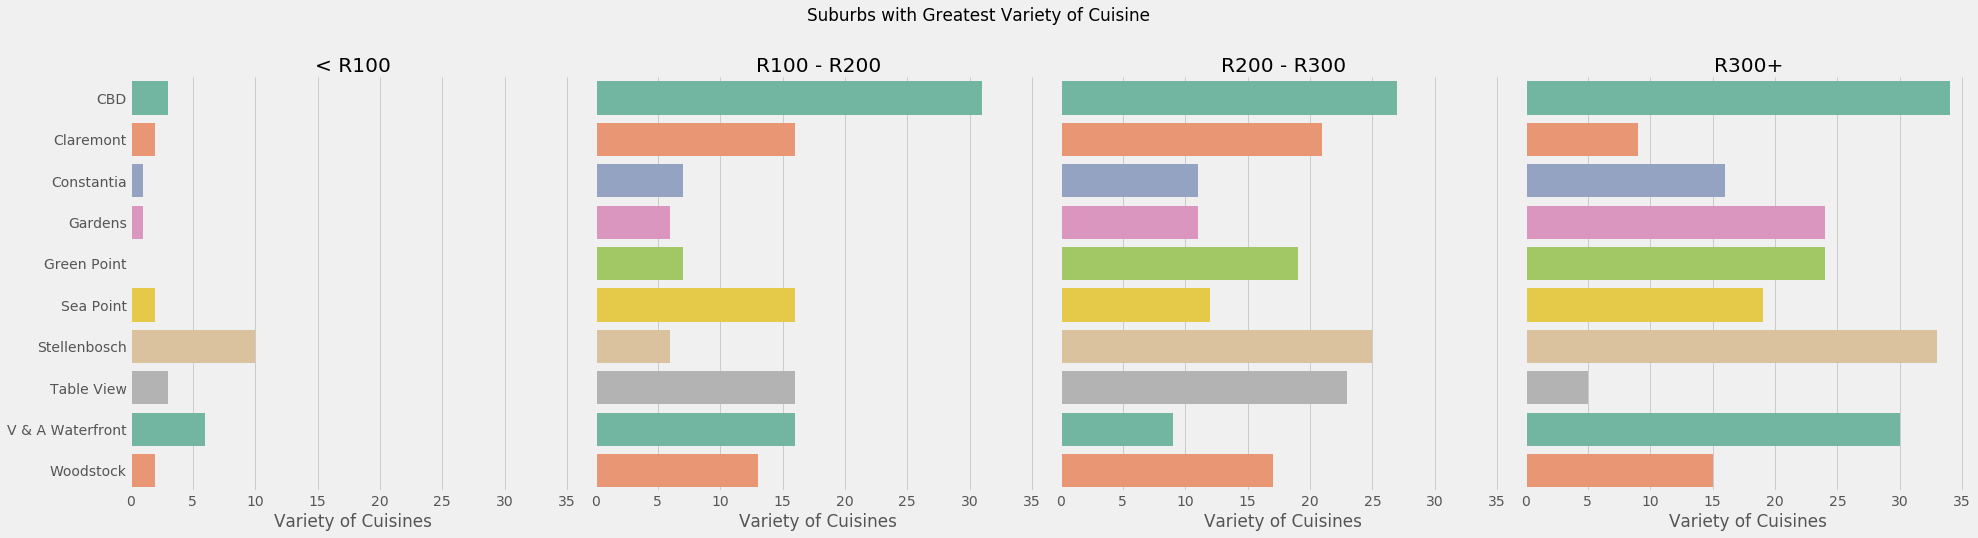

In [276]:
g = sns.catplot(kind="bar", x="variety_count", y="locality", col="price_range", data=variety_by_price, palette="Set2", height=7)
g.fig.suptitle("Suburbs with Greatest Variety of Cuisine", y=1.07)
g.set_axis_labels("Variety of Cuisines", "")
g.axes[0][0].set_title("< R100")
g.axes[0][1].set_title("R100 - R200")
g.axes[0][2].set_title("R200 - R300")
g.axes[0][3].set_title("R300+")
g.savefig("images/suburb_variety_counts", dpi=400)

# Foodie Hotspots

In [279]:
# for each hotpost, show point on map with color as rating, size as cost
# next to that, show bar chart with most common cuisines served in that region and their rating, cost and number of restaurants
# hotspots are identified as geographical boundaries such as Bree street or Kloof street

bree_street = df.l

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
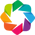

In [280]:
import xarray as xr
import pandas as pd
import geoviews as gv
import geoviews.tile_sources as gvts
import geoviews.feature as gf
from bokeh.io import output_notebook
import bokeh.palettes
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.plotting import figure, output_file, show
import geoviews.tile_sources as gts
import holoviews as hv

from cartopy import crs as ccrs

#hv.notebook_extension("matplotlib")
gv.extension('bokeh')

In [360]:
#locality = ["CBD"]
row_filter = (df.locality=="CBD") & (df.longitude <= 18.4195) & (df.longitude >= 18.412) & (df.latitude >=-33.9224)
ratings = gv.Dataset(df[row_filter], kdims=['name', 'votes', 'average_cost_for_two', 'aggregate_rating'])

points = ratings.redim(aggregate_rating=dict(range=(0, 5))).to(gv.Points, ['longitude', 'latitude'], 
                    ['aggregate_rating', 'name', 'average_cost_for_two', 'votes'])
(gts.Wikipedia * points.options(width=800, height=600, 
                                tools=['hover', 'save', 'zoom_in', 'zoom_out', 'pan' , 'wheel_zoom'],
                                colorbar=True, toolbar='above', xaxis=None, yaxis=None,
                                size_index=2, color_index=2, size=4, cmap="viridis")).redim(longitude="Longitude",
                                                                                                latitude="Latitude",
                                                                                                aggregate_rating='Rating', 
                                                                                                name='Name',
                                                                                               votes="Votes",
                                                                                               price_range="Price Range",
                                                                                               average_cost_for_two="Avg. Cost for 2 (R)",
                                                                                               cuisine_count="No. Cuisines"
                                                                                            )
## Ratings by Cuisine Count

#lat, long -33.9259, 18.4131/-33.9183 18.4214

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Rating,Name,Avg. Cost for 2 (R),Votes)

In [361]:
#locality = ["CBD"]
row_filter = (df.locality=="CBD")
ratings = gv.Dataset(df[row_filter], kdims=['name', 'votes', 'average_cost_for_two', 'aggregate_rating'])

points = ratings.redim(aggregate_rating=dict(range=(0, 5))).to(gv.Points, ['longitude', 'latitude'], 
                    ['aggregate_rating', 'name', 'average_cost_for_two', 'votes'])
(gts.Wikipedia * points.options(width=800, height=600, 
                                tools=['hover', 'save', 'zoom_in', 'zoom_out', 'pan' , 'wheel_zoom'],
                                colorbar=True, toolbar='above', xaxis=None, yaxis=None,
                                size_index=2, color_index=2, size=4, cmap="viridis")).redim(longitude="Longitude",
                                                                                                latitude="Latitude",
                                                                                                aggregate_rating='Rating', 
                                                                                                name='Name',
                                                                                               votes="Votes",
                                                                                               price_range="Price Range",
                                                                                               average_cost_for_two="Avg. Cost for 2 (R)",
                                                                                               cuisine_count="No. Cuisines"
                                                                                            )
## Ratings by Cuisine Count

#lat, long -33.9259, 18.4131/-33.9183 18.4214

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Rating,Name,Avg. Cost for 2 (R),Votes)

In [407]:
cbd_cuisine_counts = df[df.locality=="CBD"][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality=="CBD") & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality=="CBD") & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

cbd_cuisine_counts = pd.concat([cbd_cuisine_counts, good, bad], axis=1, sort=False)
cbd_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_cbd = cbd_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [415]:
bowl_cuisine_counts = df[df.locality.isin(["Gardens", "Woodstock", "De Waterkant", "Foreshore", "Tamboerskloof", "Zonnebloem", "Vredehoek"])][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality=="CBD") & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality=="CBD") & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

bowl_cuisine_counts = pd.concat([bowl_cuisine_counts, good, bad], axis=1, sort=False)
bowl_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_bowl = bowl_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [441]:
gardens_cuisine_counts = df[df.locality=="Gardens"][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality=="CBD") & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality=="CBD") & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

gardens_cuisine_counts = pd.concat([gardens_cuisine_counts, good, bad], axis=1, sort=False)
gardens_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_gardens = gardens_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [438]:
atlantic_cuisine_counts = df[df.locality.isin(["Sea Point", "Green Point"])][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality.isin(["Sea Point", "Green Point"])) & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality.isin(["Sea Point", "Green Point"])) & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

atlantic_cuisine_counts = pd.concat([atlantic_cuisine_counts, good, bad], axis=1, sort=False)
atlantic_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_atlantic = atlantic_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [424]:
stellenbosch_cuisine_counts = df[df.locality=="Stellenbosch"][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality=="Stellenbosch") & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality=="Stellenbosch") & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

stellenbosch_cuisine_counts = pd.concat([stellenbosch_cuisine_counts, good, bad], axis=1, sort=False)
stellenbosch_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_stellenbosch = stellenbosch_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [433]:
franshhoek_cuisine_counts = df[df.locality=="Franschhoek"][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality=="Franschhoek") & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality=="Franschhoek") & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

franshhoek_cuisine_counts = pd.concat([franshhoek_cuisine_counts, good, bad], axis=1, sort=False)
franshhoek_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_franshhoek = franshhoek_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [446]:
durbanville_cuisine_counts = df[df.locality=="Durbanville"][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality=="Durbanville") & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality=="Durbanville") & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

durbanville_cuisine_counts = pd.concat([durbanville_cuisine_counts, good, bad], axis=1, sort=False)
durbanville_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_durbanville = durbanville_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [447]:
claremont_cuisine_counts = df[df.locality=="Claremont"][get_cuisine_cols()].sum().to_frame()

good = df[(df.locality=="Claremont") & (df.rating_text.isin(["Good", "Very Good", "Excellent"]))][get_cuisine_cols()].sum().to_frame()
bad = df[(df.locality=="Claremont") & (df.rating_text.isin(["Poor", "Average"]))][get_cuisine_cols()].sum().to_frame()

claremont_cuisine_counts = pd.concat([claremont_cuisine_counts, good, bad], axis=1, sort=False)
claremont_cuisine_counts.columns = ["Total", "Good, Very Good, Excellent", "Poor, Average"]
top15_claremont = claremont_cuisine_counts.sort_values(by="Total", ascending=False).head(15)

In [457]:
fig, axes = plt.subplots(3, 2, figsize=(15, 30), dpi=400, sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle("Comparing Most Common Cuisines in Specific Regions", y=0.91)
ax = top15_cbd[["Good, Very Good, Excellent", "Poor, Average"]].sort_values(by="Good, Very Good, Excellent", ascending=True).plot.barh(ax=axes[0][0])
ax.set_title("CBD")
ax.set_xlabel("")
ax.legend().set_visible(False)

ax = top15_gardens[["Good, Very Good, Excellent", "Poor, Average"]].sort_values(by="Good, Very Good, Excellent", ascending=True).plot.barh(ax=axes[0][1])
ax.set_title("Gardens")
ax.set_xlabel("")
ax.legend(title="Rating")

ax = top15_atlantic[["Good, Very Good, Excellent", "Poor, Average"]].sort_values(by="Good, Very Good, Excellent", ascending=True).plot.barh(ax=axes[1][0])
ax.set_title("Sea Point & Green Point")
ax.set_xlabel("")
ax.legend().set_visible(False)

ax = top15_stellenbosch[["Good, Very Good, Excellent", "Poor, Average"]].sort_values(by="Good, Very Good, Excellent", ascending=True).plot.barh(ax=axes[1][1])
ax.set_title("Stellenbosch")
ax.set_xlabel("")
ax.legend(title="Rating")

ax = top15_durbanville[["Good, Very Good, Excellent", "Poor, Average"]].sort_values(by="Good, Very Good, Excellent", ascending=True).plot.barh(ax=axes[2][0])
ax.set_title("Durbanville")
ax.set_xlabel("Number of Restaurants")
ax.legend().set_visible(False)

ax = top15_claremont[["Good, Very Good, Excellent", "Poor, Average"]].sort_values(by="Good, Very Good, Excellent", ascending=True).plot.barh(ax=axes[2][1])
ax.set_title("Claremont")
ax.set_xlabel("Number of Restaurants")
ax.legend(title="Rating")